<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center">Exercise 1: Simple/Polynomial Linear Regression </h1>

<hr />
<center>Constructor Academy, 2024</center>

# Task

- Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the predicted values vs the values from the test dataset.

- Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

- Which one of the 4 models will you use and why?

## Import Libraries and Preprocess the Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# import functions from python script
from functions import plot_regression, predict_metrics

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# uncomment lab_black if you work in jupyter lab,
# nb_black if you work in jupyter notebook
# %load_ext lab_black
# %load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
plt.style.use("ggplot")

In [10]:
data_path = "../data/Salary_Data.csv"

In [11]:
data = pd.read_csv(data_path)
print(data.shape)
data.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Perform Train-Test Split on Salary Data 

In [12]:
# Select X and y values (predictor and outcome)
X = data.iloc[:, :-1].values  # YearsExperience
y = data.iloc[:, -1].values  # Salary

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 20 samples.
Testing set has 10 samples.


# Simple Linear Regression 
Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the predicted vs the values from the test dataset.

## Create and Fit the Model

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [15]:
print(model.intercept_, model.coef_)

26816.192244031183 [9345.94244312]


## Predict the outcome using Model

In [16]:
predictions = model.predict(X_test)

## Visualize 
#### Plot regression line and actual Train and Test data  

the source code for plot_regression is in the file functions.py

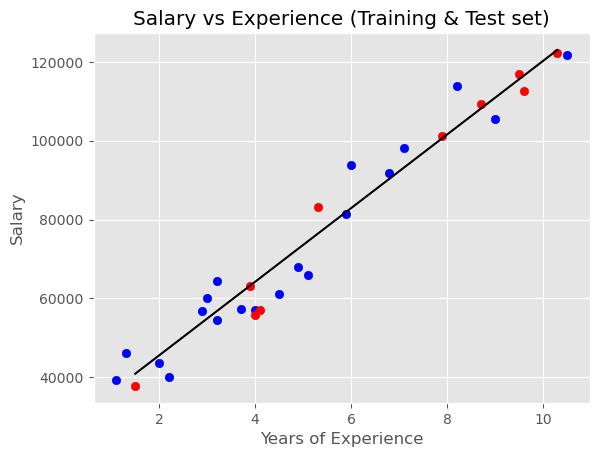

In [17]:
plot_regression(
    X_train,
    X_test,
    y_train,
    y_test,
    predictions,
    "Salary vs Experience (Training & Test set)",
)

#### Plot predicted values vs the values from the test dataset

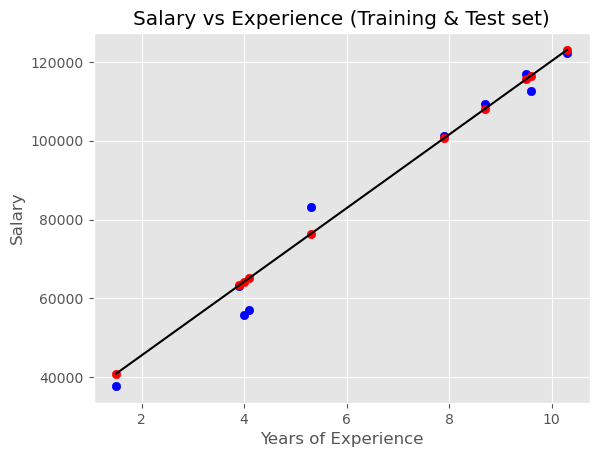

In [18]:
zipped = sorted(zip(X_test, predictions))
X_test_sorted, y_pred_sorted = zip(*zipped)
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, predictions, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted, color = 'black')
plt.title("Salary vs Experience (Training & Test set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Model Evaluation
For Linear Regression in scikit-learn, the method 'score' returns the coefficient of determination $R^2$ of the prediction: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The coefficient $R^2$ is defined as $1 - {u}/{v}$, where $u$ is the residual sum of squares $\Sigma(y_{true} - y_{pred})^2$ and $v$ is the total sum of squares $\Sigma(y_{true} - \bar y_{true})^2$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.

To find 'score' of the model one uses X_test and y_test as an input, so that model makes the predictions and then calculates the difference between actual and predicted values. 

In [19]:
model.score(X_test, y_test)

0.9749154407708353

## Further Model Evaluation

You might want to look at other metrics apart from the one already in the 'score' method of the model, in which case you can compute them using the metrics package from sklearn 

the source code for predict_metrics is in the file functions.py

In [20]:
# print('MAE',metrics.mean_absolute_error(y_test,predictions))
# print('MSE',metrics.mean_squared_error(y_test,predictions))
# print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
# print('Explained Var Score',metrics.explained_variance_score(y_test,predictions))
predict_metrics(y_test, predictions)

MAE 3426.4269374307078
MSE 21026037.329511296
RMSE 4585.4157204675885
Explained Var Score 0.9773004276108125


# Part 2: Polynomial Linear Regression
Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

we use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to create a feature matrix that contains all the degrees needed to do the regression, and then we perform linear regressions for each of these feature matrices.

## Define the base Model (simple linear regression)

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

LinearRegression()

## Transform Linear Model to Polynomial Matrix (both train and test)

In [22]:
# 2 Degrees
poly_feat2 = PolynomialFeatures(degree=2)
X_poly2 = poly_feat2.fit_transform(X_train)
X_poly2_test = poly_feat2.transform(X_test)

# 3 Degrees
poly_feat3 = PolynomialFeatures(degree=3)
X_poly3 = poly_feat3.fit_transform(X_train)
X_poly3_test = poly_feat3.transform(X_test)

# 4 Degrees
poly_feat4 = PolynomialFeatures(degree=4)
X_poly4 = poly_feat4.fit_transform(X_train)
X_poly4_test = poly_feat4.transform(X_test)

In [23]:
# Polynomial Matrices
print(X_poly2[:5, :])
print(X_poly3[:5, :])
print(X_poly4[:5, :])

[[ 1.    2.9   8.41]
 [ 1.    5.1  26.01]
 [ 1.    3.2  10.24]
 [ 1.    4.5  20.25]
 [ 1.    8.2  67.24]]
[[  1.      2.9     8.41   24.389]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      4.5    20.25   91.125]
 [  1.      8.2    67.24  551.368]]
[[1.0000000e+00 2.9000000e+00 8.4100000e+00 2.4389000e+01 7.0728100e+01]
 [1.0000000e+00 5.1000000e+00 2.6010000e+01 1.3265100e+02 6.7652010e+02]
 [1.0000000e+00 3.2000000e+00 1.0240000e+01 3.2768000e+01 1.0485760e+02]
 [1.0000000e+00 4.5000000e+00 2.0250000e+01 9.1125000e+01 4.1006250e+02]
 [1.0000000e+00 8.2000000e+00 6.7240000e+01 5.5136800e+02 4.5212176e+03]]


## Create New Lin Models Using Poly Matrix

In [24]:
lin_model2 = LinearRegression(fit_intercept=False)
lin_model2.fit(X_poly2, y_train)

lin_model3 = LinearRegression(fit_intercept=False)
lin_model3.fit(X_poly3, y_train)

lin_model4 = LinearRegression(fit_intercept=False)
lin_model4.fit(X_poly4, y_train)

LinearRegression(fit_intercept=False)

## Visualising the Models

In [25]:
def model_visualization(
    model, X_poly_test, X_train, X_test, y_train, y_test, plot_title="Linear regression"
):

    predictions = model.predict(X_poly_test)

    plot_regression(X_train, X_test, y_train, y_test, predictions, plot_title)

    print("Intercept", model.intercept_)
    print("Coefficients", model.coef_)
    print("Model Score", model.score(X_poly_test, y_test))
    predict_metrics(y_test, predictions)

### Linear Regression

Intercept 26816.192244031183
Coefficients [9345.94244312]
Model Score 0.9749154407708353
MAE 3426.4269374307078
MSE 21026037.329511296
RMSE 4585.4157204675885
Explained Var Score 0.9773004276108125


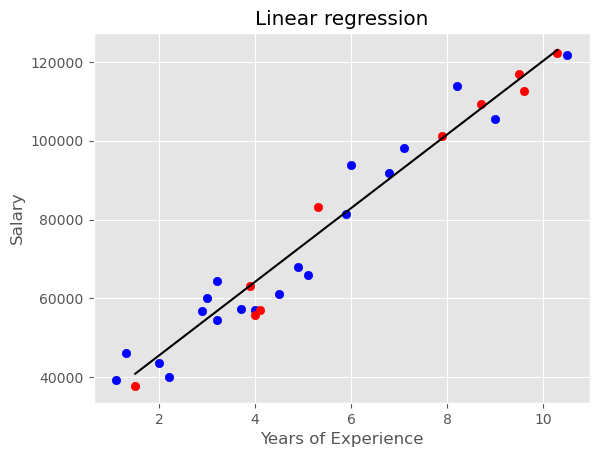

In [26]:
model_visualization(
    lin_model, X_test, X_train, X_test, y_train, y_test, plot_title="Linear regression"
)

### Polynomial Regression 2 Deg

Intercept 0.0
Coefficients [28150.60458913  8712.28148584    57.78239507]
Model Score 0.9742792461789874
MAE 3562.939035525867
MSE 21559299.688830446
RMSE 4643.199294541474
Explained Var Score 0.9771824709901481


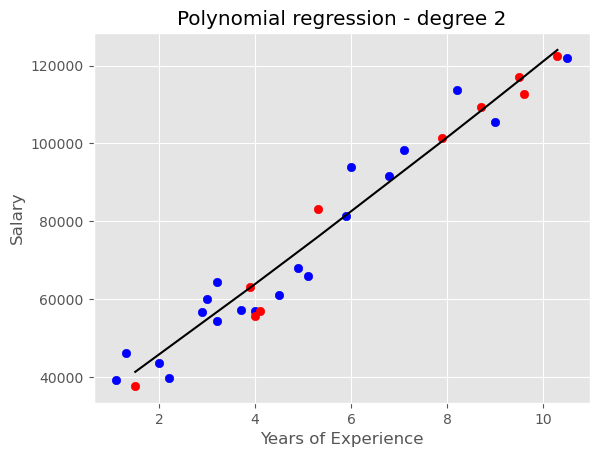

In [27]:
model_visualization(
    lin_model2,
    X_poly2_test,
    X_train,
    X_test,
    y_train,
    y_test,
    plot_title="Polynomial regression - degree 2",
)

### Polynomial Regression 3 Deg

Intercept 0.0
Coefficients [42060.48813548 -2343.14885868  2372.33722618  -136.77910017]
Model Score 0.9764448601295799
MAE 3884.852556623346
MSE 19744068.280916125
RMSE 4443.429788003421
Explained Var Score 0.9790198724235426


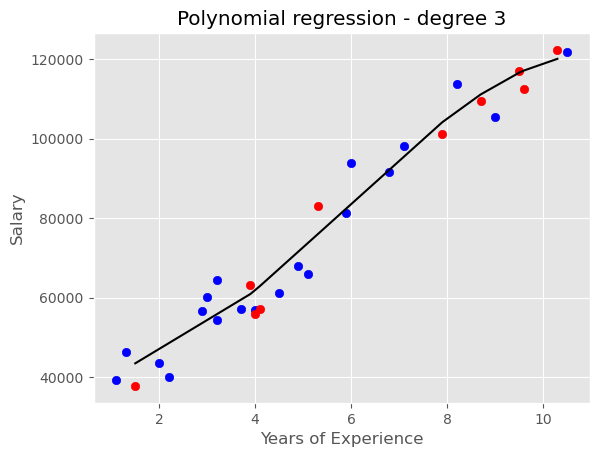

In [28]:
model_visualization(
    lin_model3,
    X_poly3_test,
    X_train,
    X_test,
    y_train,
    y_test,
    plot_title="Polynomial regression - degree 3",
)

### Polynomial Regression 4 Deg

Intercept 0.0
Coefficients [ 3.69644593e+04  3.55323371e+03  3.10709228e+02  1.36612121e+02
 -1.20714280e+01]
Model Score 0.9735947527382985
MAE 4214.7262066069425
MSE 22133046.450902212
RMSE 4704.577180884826
Explained Var Score 0.9770541144546012


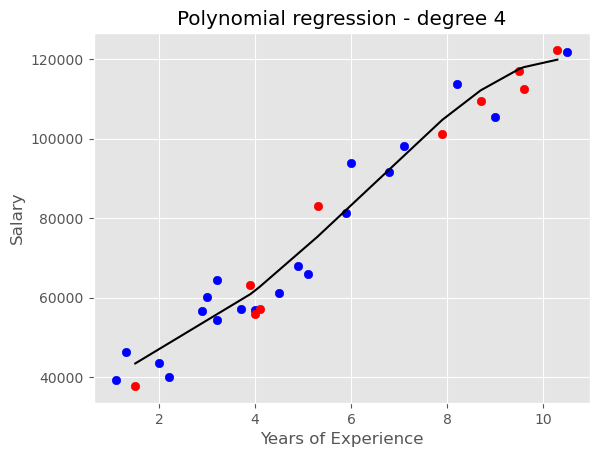

In [29]:
model_visualization(
    lin_model4,
    X_poly4_test,
    X_train,
    X_test,
    y_train,
    y_test,
    plot_title="Polynomial regression - degree 4",
)

#### example of making a prediction for someone with 6 years of experience using all the models

Please note: you need to pass the value as a ndarray of shape (1,1) or as the equivalent nested list for the predict method to return a prediction.

In [30]:
# Linear regression
print(lin_model.predict([[6]]))
# Poly - Deg 2
print(lin_model2.predict(poly_feat2.transform([[6]])))
# Poly - Deg 3
print(lin_model3.predict(poly_feat3.transform([[6]])))
# Poly - Deg 4
print(lin_model4.predict(poly_feat4.transform([[6]])))

[82891.84690277]
[82504.45972659]
[83861.44948828]
[83333.0413485]


# Part 3: Choose the Best Model 
Which one of the 4 models will you use and why?

How do we define the best model? The $R^2$ score might help! As well as model complexity. You need to find the balance between it. 

Readmore about Train and Test errors: https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

In [31]:
LM1 = lin_model.score(X_test, y_test)
LM2 = lin_model2.score(X_poly2_test, y_test)
LM3 = lin_model3.score(X_poly3_test, y_test)
LM4 = lin_model4.score(X_poly4_test, y_test)

models = ["LM1", "LM2", "LM3", "LM4"]
scores = [LM1, LM2, LM3, LM4]

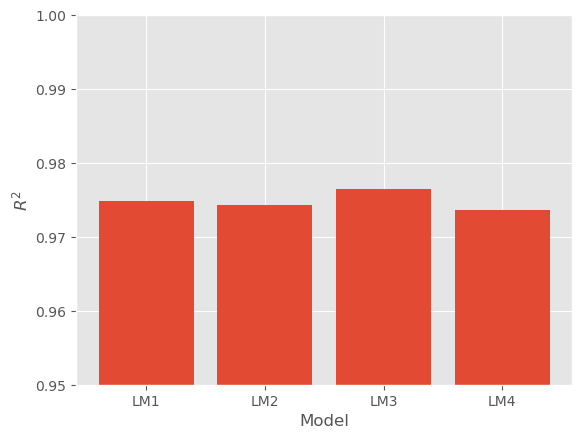

In [32]:
plt.bar(models, scores)

plt.ylim([0.95, 1])
plt.xlabel("Model")
plt.ylabel("$R^2$")
None

## Answer:
- We can choose the linear regression (lin_model) as it is the simplest model and $R^2$ is very close to that of the other models. Depending on random data splitting into train and test sets, results could be different.

--------------
# End of This Notebook